<a href="https://colab.research.google.com/github/barta3235/working_model_resnet/blob/main/working_model_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, applications, Model
from tensorflow.keras.models import Model
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
!pip install lime

<ipython-input-2-e93ab880760a>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=883cc6706ab3d9aa39239d067ae48c63db2ccd31a97686e6427555ad1aca08a7
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/499_brainMRI_dataset/Ohyes')
X = []
y = []
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append((i[0:1]))
      print(i[0:1])
os.chdir('/content/drive/MyDrive/499_brainMRI_dataset/noppers')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
print(len(X))
for i in range(1,3245):
    y.append('N')
print(y)

  0%|          | 0/4273 [00:00<?, ?it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


  0%|          | 0/3244 [00:00<?, ?it/s]

7517
['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',

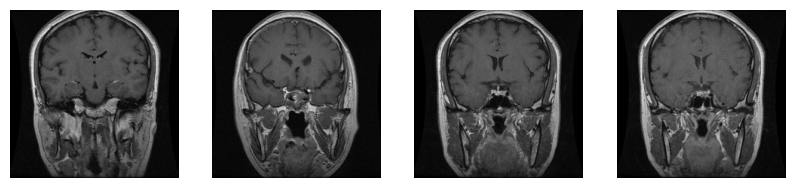

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)


In [ ]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (5036, 224, 224, 3)
X_test Shape:  (2481, 224, 224, 3)
y_train Shape:  (5036, 2)
y_test Shape:  (2481, 2)


In [ ]:
# import tensorflow as tf
# from tensorflow.keras import layers

# def residual_block(x, filters, kernel_size=3, stride=1):
#     # Shortcut
#     shortcut = x

#     # First convolution
#     x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.ReLU()(x)

#     # Second convolution
#     x = layers.Conv2D(filters, kernel_size, padding='same')(x)
#     x = layers.BatchNormalization()(x)

#     # Shortcut connection
#     if stride != 1 or shortcut.shape[-1] != filters:
#         shortcut = layers.Conv2D(filters, 1, strides=stride, padding='valid')(shortcut)
#         shortcut = layers.BatchNormalization()(shortcut)

#     x = layers.Add()([x, shortcut])
#     x = layers.ReLU()(x)

#     return x

# def build_resnet(input_shape, num_classes):
#     input_tensor = layers.Input(shape=input_shape)

#     # Initial Convolution
#     x = layers.Conv2D(64, 7, strides=2, padding='same')(input_tensor)
#     x = layers.BatchNormalization()(x)
#     x = layers.ReLU()(x)
#     x = layers.MaxPooling2D(3, strides=2, padding='same')(x)

#     # Residual blocks
#     num_blocks_list = [3, 4, 6, 3]
#     filters_list = [64, 128, 256, 512]

#     for stage, num_blocks, filters in zip(range(4), num_blocks_list, filters_list):
#         # First block in each stage with a stride of 2
#         x = residual_block(x, filters, stride=2)

#         # Additional blocks in each stage
#         for _ in range(num_blocks - 1):
#             x = residual_block(x, filters)

#     # Global average pooling and dense layer for classification
#     x = layers.GlobalAveragePooling2D()(x)
#     x = layers.Dense(num_classes, activation='softmax')(x)

#     model = tf.keras.models.Model(inputs=input_tensor, outputs=x)

#     return model

# # Define the input shape and number of classes
# input_shape = (224, 224, 3)  # Adjust based on your dataset
# num_classes = 2  # Yes tumor and No tumor

# # Build and compile the model
# model = build_resnet(input_shape, num_classes)

# # Display model summary
# model.summary()



import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50

def residual_block(x, filters, kernel_size=3, stride=1):
    # Shortcut
    shortcut = x

    # First convolution
    x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Second convolution
    x = layers.Conv2D(filters, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)

    # Shortcut connection
    if stride != 1 or shortcut.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, 1, strides=stride, padding='valid')(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.Add()([x, shortcut])
    x = layers.ReLU()(x)

    return x

def build_pretrained_resnet(input_shape, num_classes):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

    for layer in base_model.layers:
        layer.trainable = False  # Freeze pretrained layers

    x = base_model.output

    # Residual blocks
    num_blocks_list = [3, 4, 6, 3]
    filters_list = [64, 128, 256, 512]

    for stage, num_blocks, filters in zip(range(4), num_blocks_list, filters_list):
        # First block in each stage with a stride of 2
        x = residual_block(x, filters, stride=2)

        # Additional blocks in each stage
        for _ in range(num_blocks - 1):
            x = residual_block(x, filters)

    # Global average pooling and dense layer for classification
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.5)(x)  # Add dropout for regularization
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.models.Model(inputs=base_model.input, outputs=x)

    return model

# Define the input shape and number of classes
input_shape = (224, 224, 3)  # Adjust based on your dataset
num_classes = 2  # Yes tumor and No tumor

# Build and compile the pretrained ResNet50-based model
model = build_pretrained_resnet(input_shape, num_classes)

# Display model summary
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_9[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',
                       tf.keras.metrics.TrueNegatives(),
                       tf.keras.metrics.FalsePositives(),
                       tf.keras.metrics.SpecificityAtSensitivity(0.5)])

In [ ]:
history =model.fit(X_train,y_train,
                    epochs=5,
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    initial_epoch=0)

Epoch 1/5
158/158 [==============================] - 1781s 11s/step - loss: 0.3342 - accuracy: 0.9114 - true_negatives_3: 4590.0000 - false_positives_3: 446.0000 - specificity_at_sensitivity_3: 0.9855 - val_loss: 0.1928 - val_accuracy: 0.9532 - val_true_negatives_3: 2365.0000 - val_false_positives_3: 116.0000 - val_specificity_at_sensitivity_3: 0.9964
Epoch 2/5
158/158 [==============================] - 1783s 11s/step - loss: 0.0864 - accuracy: 0.9722 - true_negatives_3: 4896.0000 - false_positives_3: 140.0000 - specificity_at_sensitivity_3: 0.9986 - val_loss: 0.1291 - val_accuracy: 0.9593 - val_true_negatives_3: 2380.0000 - val_false_positives_3: 101.0000 - val_specificity_at_sensitivity_3: 0.9992
Epoch 3/5
158/158 [==============================] - 1930s 12s/step - loss: 0.0491 - accuracy: 0.9849 - true_negatives_3: 4960.0000 - false_positives_3: 76.0000 - specificity_at_sensitivity_3: 0.9988 - val_loss: 0.1570 - val_accuracy: 0.9698 - val_true_negatives_3: 2406.0000 - val_false_posi

In [ ]:
model.save('/content/drive/MyDrive/work_temp/model_resnet_new')

**LIME Explanation**

**Test one**

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


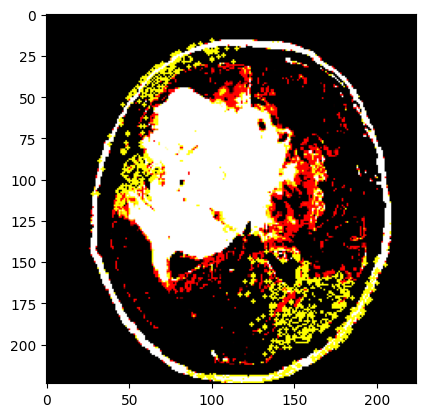

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Function to load and preprocess the image
def load_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    # Adjust preprocessing as needed for your model
    img = preprocess_input(img)  # Make sure this matches your model's expected input
    return img

# Adjust this prediction function as per your model's requirements
def predict(model, img_array):
    preds = model.predict(img_array)
    return preds

# Function to explain an instance with LIME
def explain_instance_with_lime(model, img_path, top_labels=2, hide_color=0, num_samples=1000):
    explainer = lime_image.LimeImageExplainer()
    img = load_image(img_path)
    explanation = explainer.explain_instance(img[0].astype('double'),
                                             classifier_fn=lambda x: predict(model, x),
                                             top_labels=top_labels,
                                             hide_color=hide_color,
                                             num_samples=num_samples)
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.show()

# Assuming 'model' is your fine-tuned model with the provided compilation parameters

# Path to your test image
img_path = '/content/drive/MyDrive/sampleImagesToTest/Y2.jpg'  # Update this with the actual path to your image

# Use the function to explain a prediction
explain_instance_with_lime(model, img_path)


**Test Two**

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


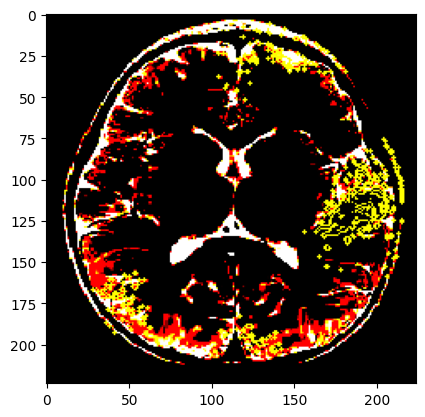

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from lime import lime_image
from skimage.segmentation import mark_boundaries
from tensorflow.keras.applications.vgg16 import preprocess_input

# Function to load and preprocess the image
def load_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    # Adjust preprocessing as needed for your model
    img = preprocess_input(img)  # Make sure this matches your model's expected input
    return img

# Adjust this prediction function as per your model's requirements
def predict(model, img_array):
    preds = model.predict(img_array)
    return preds

# Function to explain an instance with LIME
def explain_instance_with_lime(model, img_path, top_labels=2, hide_color=0, num_samples=100):
    explainer = lime_image.LimeImageExplainer()
    img = load_image(img_path)
    explanation = explainer.explain_instance(img[0].astype('double'),
                                             classifier_fn=lambda x: predict(model, x),
                                             top_labels=top_labels,
                                             hide_color=hide_color,
                                             num_samples=num_samples)
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.show()

# Assuming 'model' is your fine-tuned model with the provided compilation parameters

# Path to your test image
img_path = '/content/drive/MyDrive/sampleImagesToTest/4 no.jpg'  # Update this with the actual path to your image

# Use the function to explain a prediction
explain_instance_with_lime(model, img_path)


**Test Three**

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 241ms/step


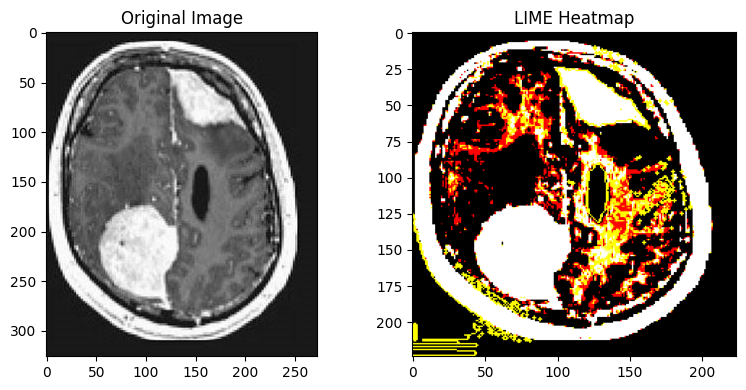

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Load the pre-trained VGG16 model from your drive
model = load_model('/content/drive/MyDrive/work_temp/model_resnet_new')

# Load and preprocess the image
def load_image(img_path, model_preprocess=preprocess_input, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = model_preprocess(img_array)
    return img_array

# Specify the path to your image
img_path = '/content/drive/MyDrive/sampleImagesToTest/Y2N (21).jpg'
img_array = load_image(img_path)

# Initialize a LimeImageExplainer
explainer = lime_image.LimeImageExplainer()

# Explain the prediction of the model on the input image
explanation = explainer.explain_instance(img_array[0], model.predict, top_labels=2, hide_color=0, num_samples=100)

# Get the mask for the explanation of the top class (assuming binary classification)
temp, mask = explanation.get_image_and_mask(model.predict(img_array).argmax(axis=1)[0], positive_only=True, negative_only=False, hide_rest=False)

# Plot the original image and the explanation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Original image
ax1.imshow(image.load_img(img_path))
ax1.set_title('Original Image')

# Lime heatmap
ax2.imshow(mark_boundaries(temp / 2 + 0.5, mask))
ax2.set_title('LIME Heatmap')

plt.tight_layout()
plt.show()


**Super pixel Boundaries**

**Test One**

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


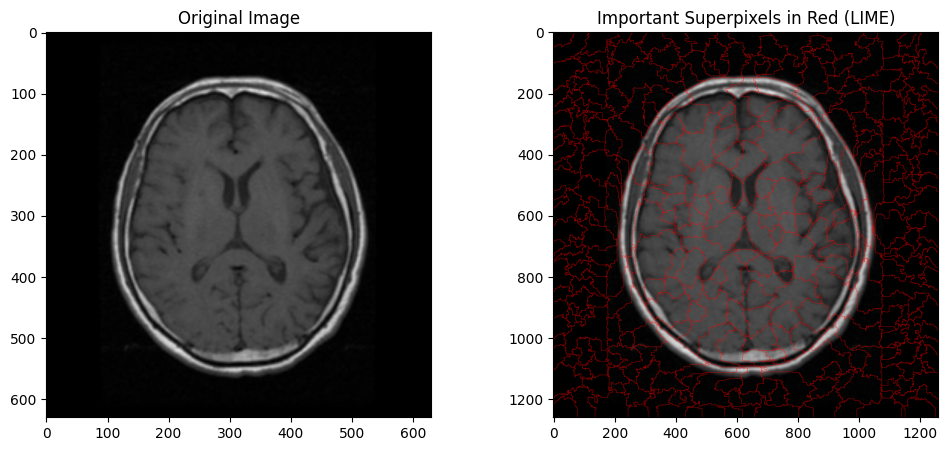

In [ ]:
import tensorflow as tf
import numpy as np
from skimage.segmentation import mark_boundaries
from lime.lime_image import LimeImageExplainer
import cv2  # Import OpenCV for image processing
import matplotlib.pyplot as plt

def predict_fn(images):
    images = np.array([cv2.resize(img, (224, 224)) for img in images])
    predictions = model.predict(images)
    return predictions

explainer = LimeImageExplainer()

sample_index = 0
selected_image_path = '/content/drive/MyDrive/sampleImagesToTest/48 no.jpeg'  # Specify the file path to the image
selected_label = 'Y'

selected_image = cv2.imread(selected_image_path)  # Load the image using OpenCV

explanation = explainer.explain_instance(selected_image, predict_fn, top_labels=1, num_samples=100)

perturbed_image = explanation.segments

superpixel_boundaries = mark_boundaries(selected_image, perturbed_image, color=(1, 0, 0), mode='subpixel')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(selected_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(superpixel_boundaries)
plt.title('Important Superpixels in Red (LIME)')
plt.show()


**Test Two**

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


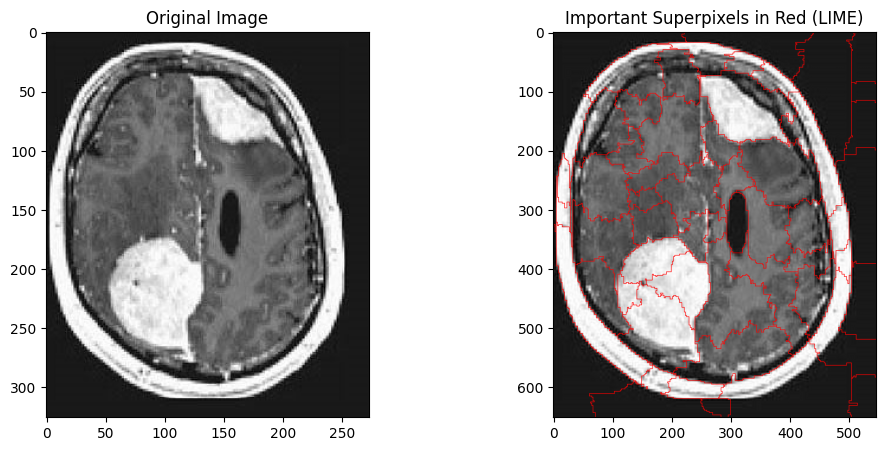

In [ ]:
import tensorflow as tf
import numpy as np
from skimage.segmentation import mark_boundaries
!pip install lime
from lime.lime_image import LimeImageExplainer
import cv2
import matplotlib.pyplot as plt

# Load your pre-trained model
model_path = '/content/drive/MyDrive/work_temp/model_resnet_new'  # Update with your model path
model = tf.keras.models.load_model(model_path)

def predict_fn(images):
    images = np.array([cv2.resize(img, (224, 224)) for img in images])
    predictions = model.predict(images)
    return predictions

explainer = LimeImageExplainer()

sample_index = 0
selected_image_path = '/content/drive/MyDrive/sampleImagesToTest/Y2N (21).jpg'  # Specify the file path to the image
selected_label = 'Y'

selected_image = cv2.imread(selected_image_path)  # Load the image using OpenCV

explanation = explainer.explain_instance(selected_image, predict_fn, top_labels=1, num_samples=1000)

perturbed_image = explanation.segments

superpixel_boundaries = mark_boundaries(selected_image, perturbed_image, color=(1, 0, 0), mode='subpixel')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(selected_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(superpixel_boundaries)
plt.title('Important Superpixels in Red (LIME)')
plt.show()


**Testing model**

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np

# Specify the path to your model
model_path = '/content/drive/MyDrive/work_temp/model_resnet_new'

# Load the pre-trained model
model = load_model(model_path)

# Specify the path to the uploaded image
uploaded_image_path = '/content/drive/MyDrive/sampleImagesToTest/Y2.jpg'

# Load and preprocess the image
img = image.load_img(uploaded_image_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)

# Make the prediction
prediction = model.predict(img)

# Interpret the prediction
if prediction[0][0] > prediction[0][1]:
    result = "No Tumor"
else:
    result = "Tumor"

print("Prediction: ", result)


1/1 [==============================] - 5s 5s/step
Prediction:  Tumor


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np

# Specify the path to your model
model_path = '/content/drive/MyDrive/work_temp/model_resnet_new'

# Load the pre-trained model
model = load_model(model_path)

# Specify the path to the uploaded image
uploaded_image_path = '/content/drive/MyDrive/sampleImagesToTest/4 no.jpg'

# Load and preprocess the image
img = image.load_img(uploaded_image_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)

# Make the prediction
prediction = model.predict(img)

# Interpret the prediction
if prediction[0][0] > prediction[0][1]:
    result = "No Tumor"
else:
    result = "Tumor"

print("Prediction: ", result)


1/1 [==============================] - 7s 7s/step
Prediction:  No Tumor


**GRAD-CAM**

**Test one**

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np

# Specify the path to your model
model_path = '/content/drive/MyDrive/work_temp/model_resnet_new'

# Load the pre-trained model
model = load_model(model_path)

# Specify the path to the uploaded image
uploaded_image_path = '/content/drive/MyDrive/sampleImagesToTest/Y2N (21).jpg'

# Load and preprocess the image
img = image.load_img(uploaded_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array_expanded_dims = np.expand_dims(img_array, axis=0)
img = preprocess_input(img_array_expanded_dims)

# Make the prediction
prediction = model.predict(img)

# Interpret the prediction
probability = prediction[0][1]
if probability > 0.5:
    result = "Tumor"
else:
    result = "No Tumor"

print("Prediction: ", result)
print("Probability: {:.2f}%".format(probability * 100))


1/1 [==============================] - 2s 2s/step
Prediction:  Tumor
Probability: 99.11%


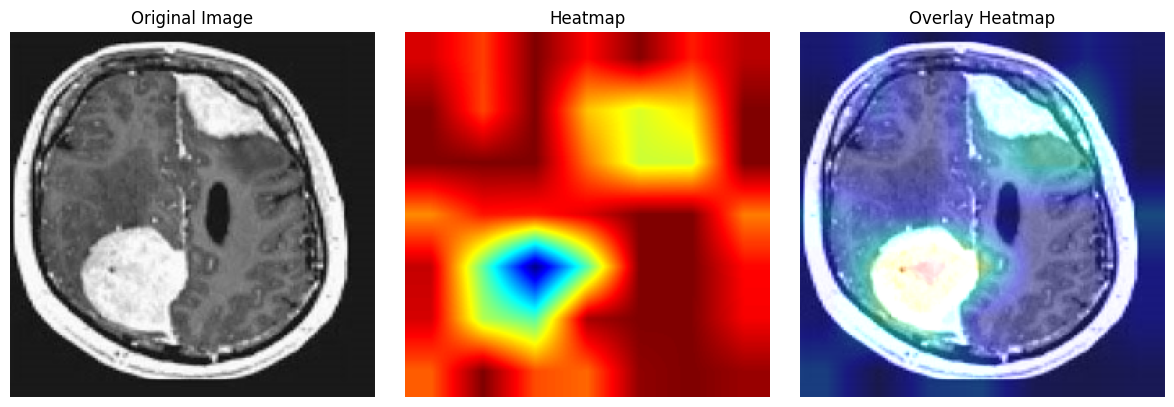

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2


# Preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

# Load and preprocess your image
img_path = '/content/drive/MyDrive/sampleImagesToTest/Y2N (21).jpg'  # Update with your path
preprocessed_img = load_preprocess_image(img_path)

# Grad-CAM algorithm
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Create the heatmap
last_conv_layer_name = 'conv5_block1_0_conv'
heatmap = make_gradcam_heatmap(preprocessed_img, model, last_conv_layer_name)

# Superimpose the heatmap over the original image
def save_and_display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to the same size as model input
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))  # Resize heatmap
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

    # Create a figure to display original, heatmap, and overlay
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap)
    plt.title('Heatmap')
    plt.axis('off')

    # Overlay
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Overlay Heatmap')
    plt.axis('off')

    # Show and save the figure
    plt.tight_layout()
    plt.show()
    plt.savefig('/content/drive/MyDrive/work_temp/gradcam_composite.jpg')

# Apply Grad-CAM
save_and_display_gradcam(img_path, heatmap)


# conv5_block1_2_conv
# conv5_block1_0_conv

**Test two**

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np

# Specify the path to your model
model_path = '/content/drive/MyDrive/work_temp/model_resnet_new'

# Load the pre-trained model
model = load_model(model_path)

# Specify the path to the uploaded image
uploaded_image_path = '/content/drive/MyDrive/sampleImagesToTest/Tr-no_0205.jpg'

# Load and preprocess the image
img = image.load_img(uploaded_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array_expanded_dims = np.expand_dims(img_array, axis=0)
img = preprocess_input(img_array_expanded_dims)

# Make the prediction
prediction = model.predict(img)

# Interpret the prediction
probability = prediction[0][1]
if probability > 0.5:
    result = "Tumor"
else:
    result = "No Tumor"

print("Prediction: ", result)
print("Probability: {:.2f}%".format(probability * 100))


1/1 [==============================] - 3s 3s/step
Prediction:  No Tumor
Probability: 0.00%


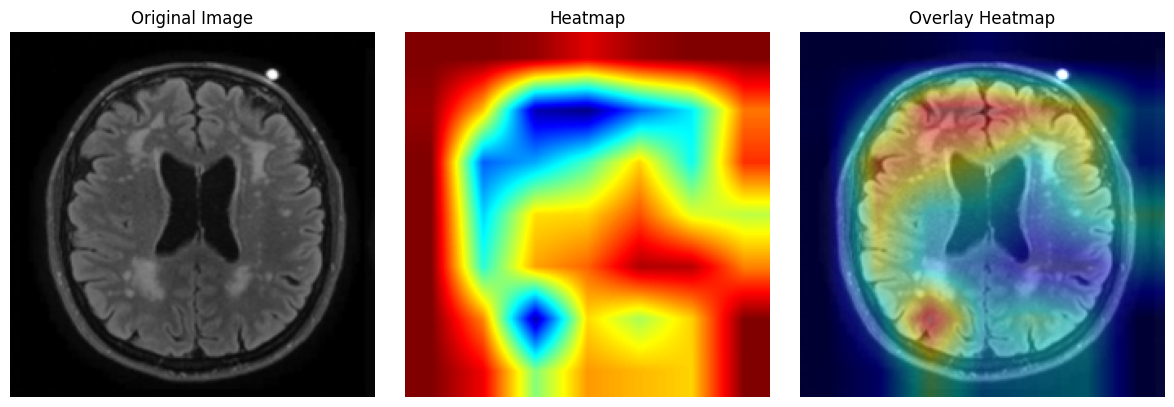

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2


# Preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

# Load and preprocess your image
img_path = '/content/drive/MyDrive/sampleImagesToTest/Tr-no_0205.jpg'  # Update with your path
preprocessed_img = load_preprocess_image(img_path)

# Grad-CAM algorithm
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Create the heatmap
last_conv_layer_name = 'conv5_block1_0_conv'  # Update with your last conv layer name
heatmap = make_gradcam_heatmap(preprocessed_img, model, last_conv_layer_name)

# Superimpose the heatmap over the original image
def save_and_display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to the same size as model input
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))  # Resize heatmap
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

    # Create a figure to display original, heatmap, and overlay
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap)
    plt.title('Heatmap')
    plt.axis('off')

    # Overlay
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Overlay Heatmap')
    plt.axis('off')

    # Show and save the figure
    plt.tight_layout()
    plt.show()
    plt.savefig('/content/drive/MyDrive/work_temp/gradcam_composite.jpg')

# Apply Grad-CAM
save_and_display_gradcam(img_path, heatmap)


